# Intent-Aware Planning Experiments

## Quick Start

```python
from experiments import *

# Choose a planner configuration
config = get_config_mppi_particle()   # Particle-based predictions
# config = get_config_mppi_worst()    # Worst-case predictions
# config = get_config_probabilistic() # CC-MPC

# Run experiment
result = run_experiment(config)
```

## Key Parameters

### Planner Selection
- **`get_config_mppi_particle()`** - Uses predicted particles (256 particles)
- **`get_config_mppi_worst()`** - Worst-case safety (1 particle, conservative)
- **`get_config_probabilistic()`** - CC-MPC planner (no dynamics model)

### Tuning Parameters: You can select parameters in experiments/config.py

| Parameter | Description | Default | Range |
|-----------|-------------|---------|-------|
| `gamma` | Risk sensitivity (higher = safer) | 3.0 | 1-10+ |
| `alpha` | Collision risk threshold (VaR level) | 0.05 | 0.01-0.2 |
| `cvar_weight` | Safety vs speed tradeoff | 1000.0 | 10-10000 |
| `particle_count` | Number of prediction particles | 256 | 1-512 |
| `T_max` | Max simulation timesteps | 500 | 50-500 |


### Scenario Setup

```python
Right-Straight scenario:
config.obstacle_goals = [[-2.0, 0.0], [0.0, -2.0], [0.0, 2.0]]  # Possible goals of obstacle
config.target_goal = [-2.0, 0.0]     # Actual goal of obstacle
config.obs_init = [2.0, 0.0]         # Obstacle start position
config.ego_init = [-2.0, 0.0, 0.0, 2.0]  # Ego start [x, y, theta, v]
config.ego_goal = [2.0, 0.0]         # Ego target position
```

## Custom Configuration

```python
config = get_config_custom(
    planner_type="MPPI", # "MPPI" for particle or worst, "Probabilistic" for Chance-Constrained-MPC
    dynamics_type="Predict_TV", #  "Predict_TV" for particle, "Worst" for worst, None for Chance-Constrained-MPC
    gamma=3.0,           # Risk sensitivity
    alpha=0.1,           # Collision threshold, collision_threshold=0.1 for CC-MPC
    T_max=300,           # Simulation length
    cvar_weight=500.0,   # Safety weight
    particle_count=256   # Prediction particles
    num_samples=512      # n of rollouts
    save_plots=True      # show and save plots
)
```

## Results

```python
result['min_distance']   # Minimum distance to obstacle
result['time_to_goal']   # Time to reach goal
```



Intent-Aware MPPI Planner defined successfully!
Config 1: Planner=MPPI, Dynamics=Predict_TV
Config 2: Planner=MPPI, Dynamics=Worst
Config 3: Planner=Probabilistic, Dynamics=None
SingleBVPNet(
  (net): FCBlock(
    (net): Sequential(
      (0): Sequential(
        (0): BatchLinear(in_features=14, out_features=512, bias=True)
        (1): Sine()
      )
      (1): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (2): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (3): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (4): Sequential(
        (0): BatchLinear(in_features=512, out_features=1, bias=True)
      )
    )
  )
)
   Loaded CBVF model: Predict_TV
   IntentAwarePlanner initialized
   Planner: MPPI
   Dynamics: Predict_TV
   Target goal: [-2.0, 0.0]
   Device: cuda

🚀 Starting simu

/home/sht/sht_project/particle_deepreach_upload/deepreach/simulations/utils_exp/intent_prediction_Pedestrian.py:300: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beta_idx = idx // self.G


✅ Goal reached at step 24 (time: 2.40s)
[metrics] min ego–obs distance: 0.693

📊 Simulation Complete!
   Steps: 24
   Time to goal: 2.40s
   Steps to goal: 24
   Min distance to obstacle: 0.693m
   Avg update time: 0.0005s
   Avg planning time: 1.3749s


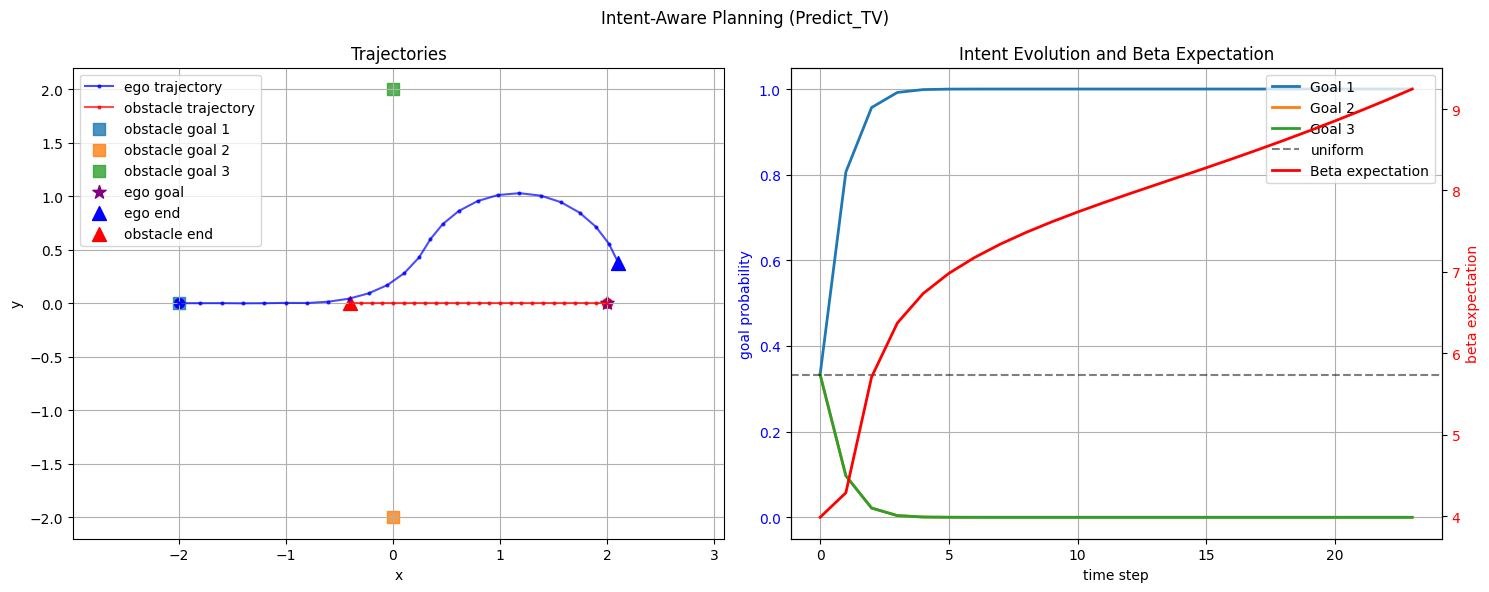

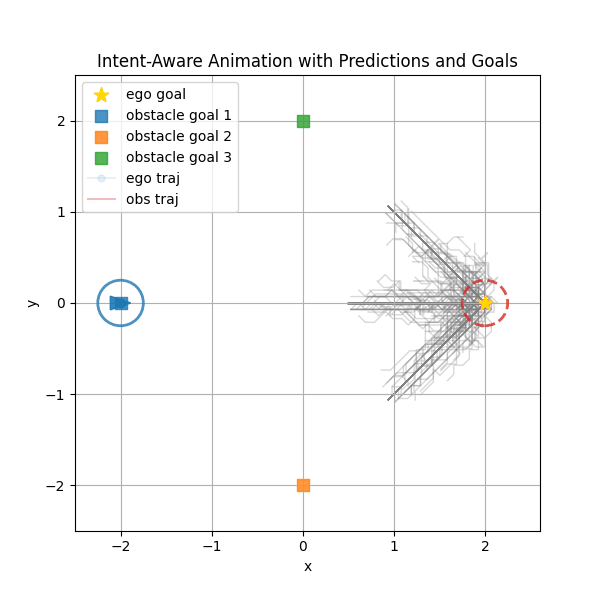

✅ Control animation saved to: figs/results_Predict_TV_target_goal[-2.0, 0.0]_controls.gif


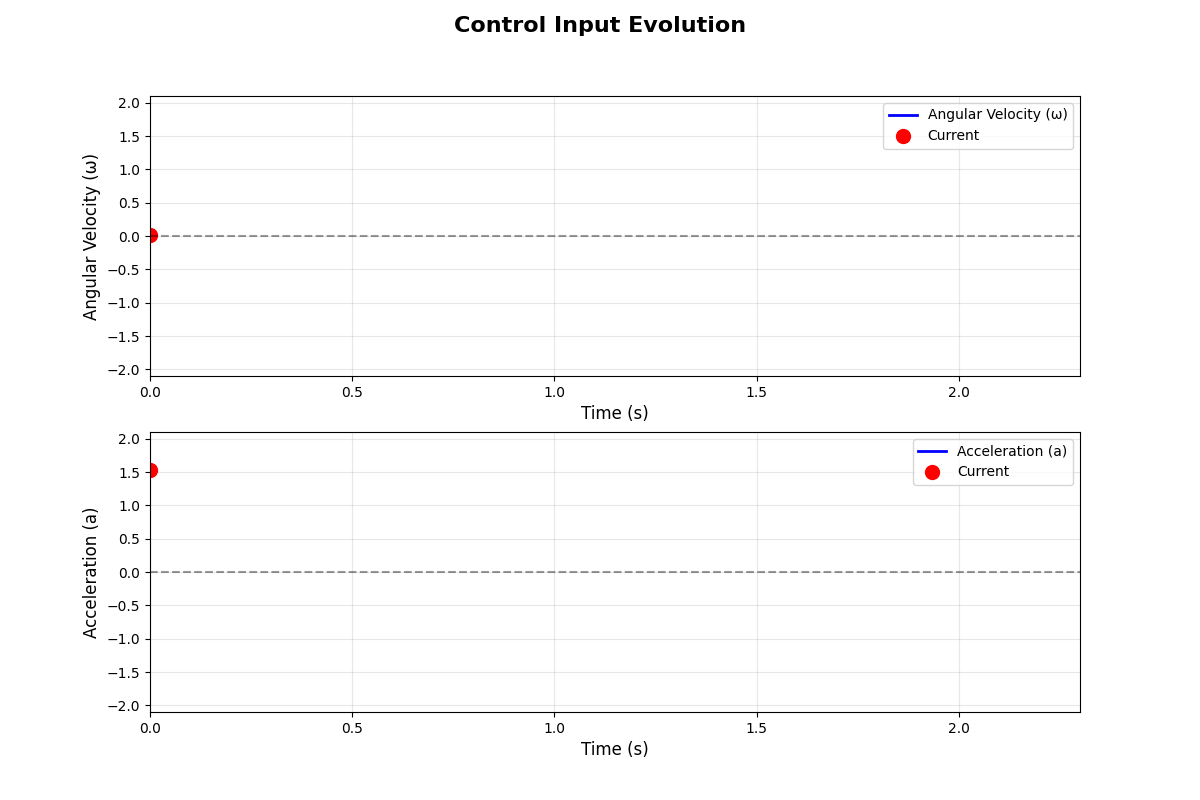

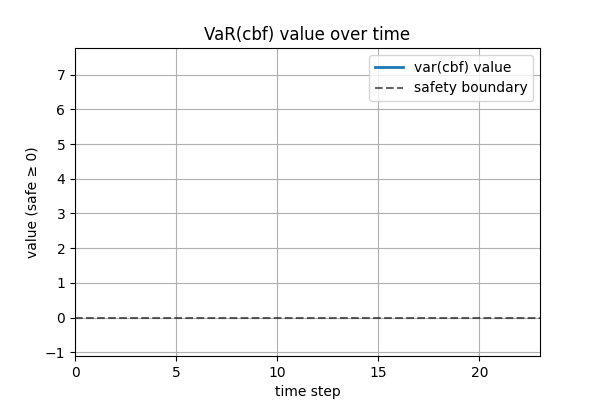

✅ Animation saved to: figs/results_Predict_TV_target_goal[-2.0, 0.0]_var.gif


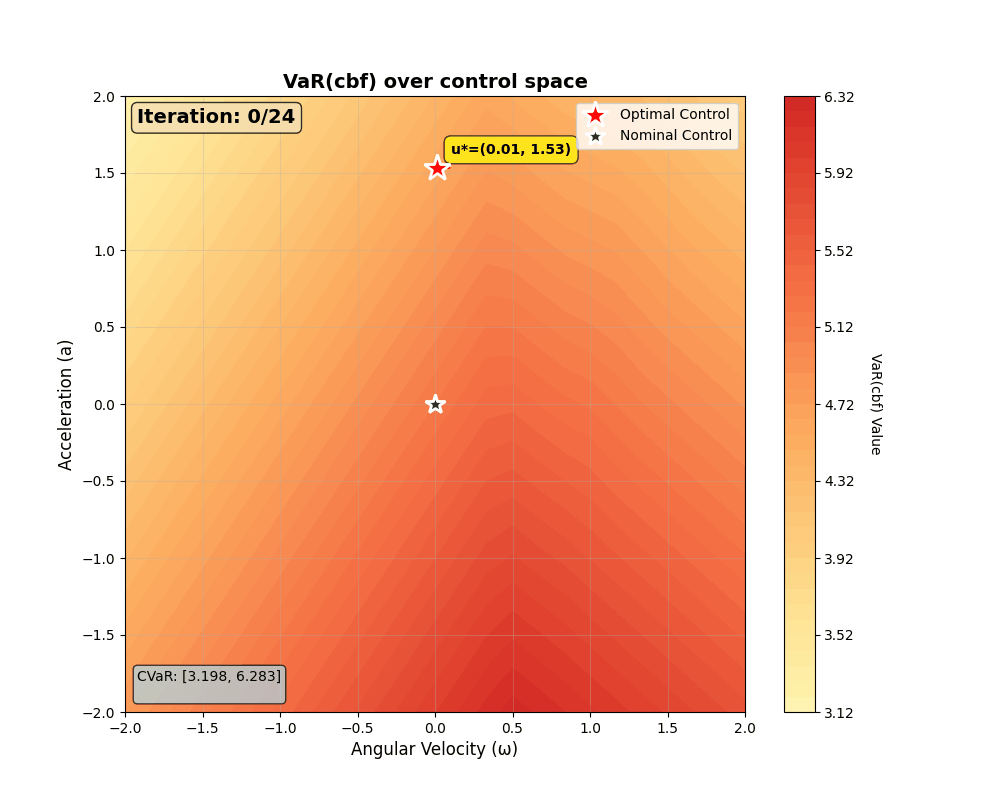

📊 Plots saved!
SingleBVPNet(
  (net): FCBlock(
    (net): Sequential(
      (0): Sequential(
        (0): BatchLinear(in_features=8, out_features=512, bias=True)
        (1): Sine()
      )
      (1): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (2): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (3): Sequential(
        (0): BatchLinear(in_features=512, out_features=512, bias=True)
        (1): Sine()
      )
      (4): Sequential(
        (0): BatchLinear(in_features=512, out_features=1, bias=True)
      )
    )
  )
)
   Loaded CBVF model: Worst
   IntentAwarePlanner initialized
   Planner: MPPI
   Dynamics: Worst
   Target goal: [-2.0, 0.0]
   Device: cuda

🚀 Starting simulation: T_max=40
   Obstacle target: [-2.0, 0.0]


/home/sht/sht_project/particle_deepreach_upload/deepreach/simulations/utils_exp/intent_prediction_Pedestrian.py:300: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beta_idx = idx // self.G


✅ Goal reached at step 23 (time: 2.30s)
[metrics] min ego–obs distance: 0.936

📊 Simulation Complete!
   Steps: 23
   Time to goal: 2.30s
   Steps to goal: 23
   Min distance to obstacle: 0.936m
   Avg update time: 0.0005s
   Avg planning time: 0.1218s


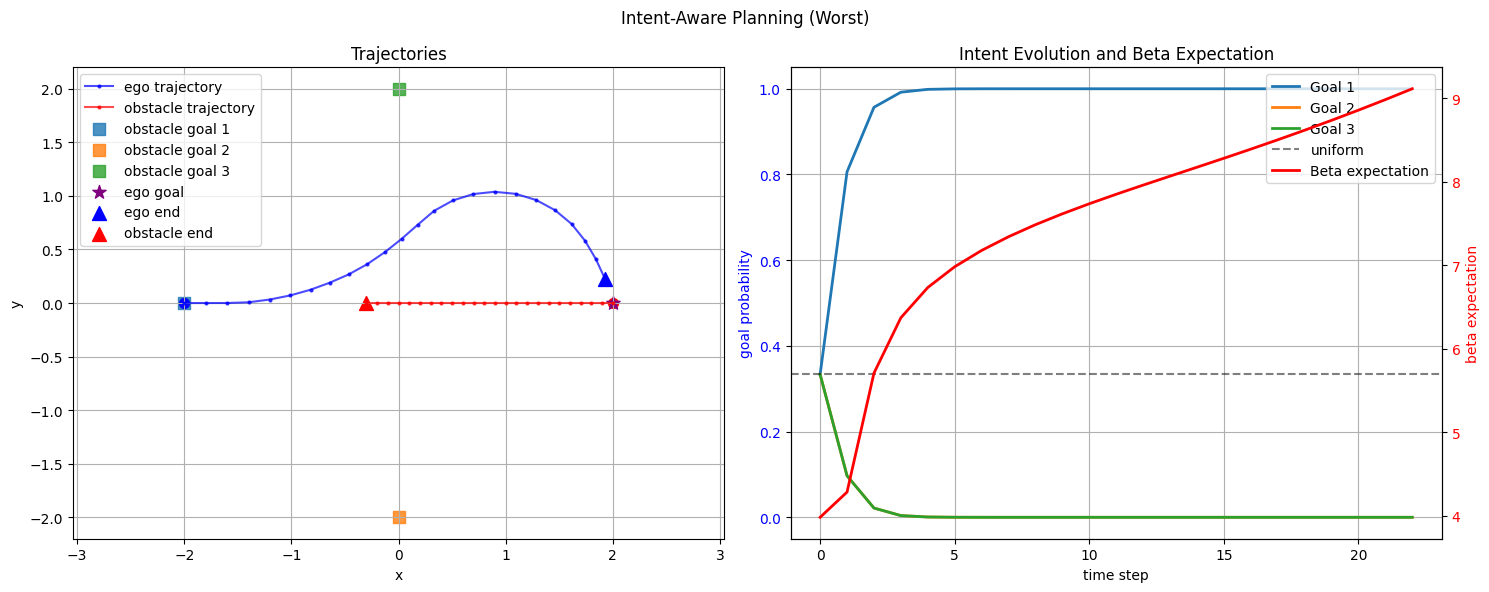

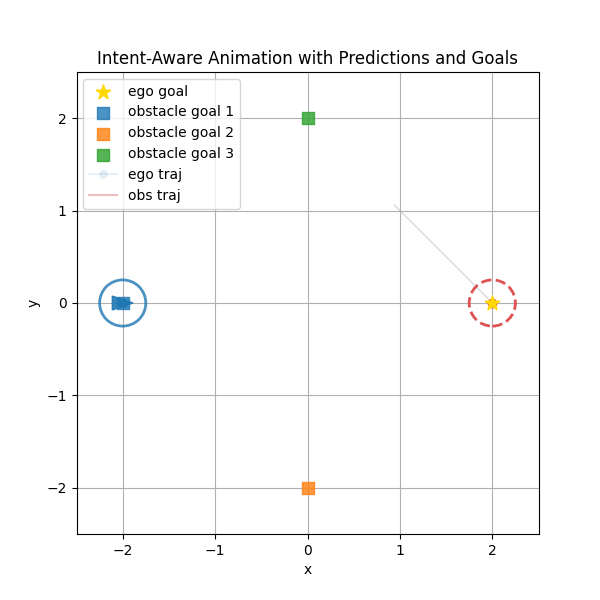

✅ Control animation saved to: figs/results_Worst_target_goal[-2.0, 0.0]_controls.gif


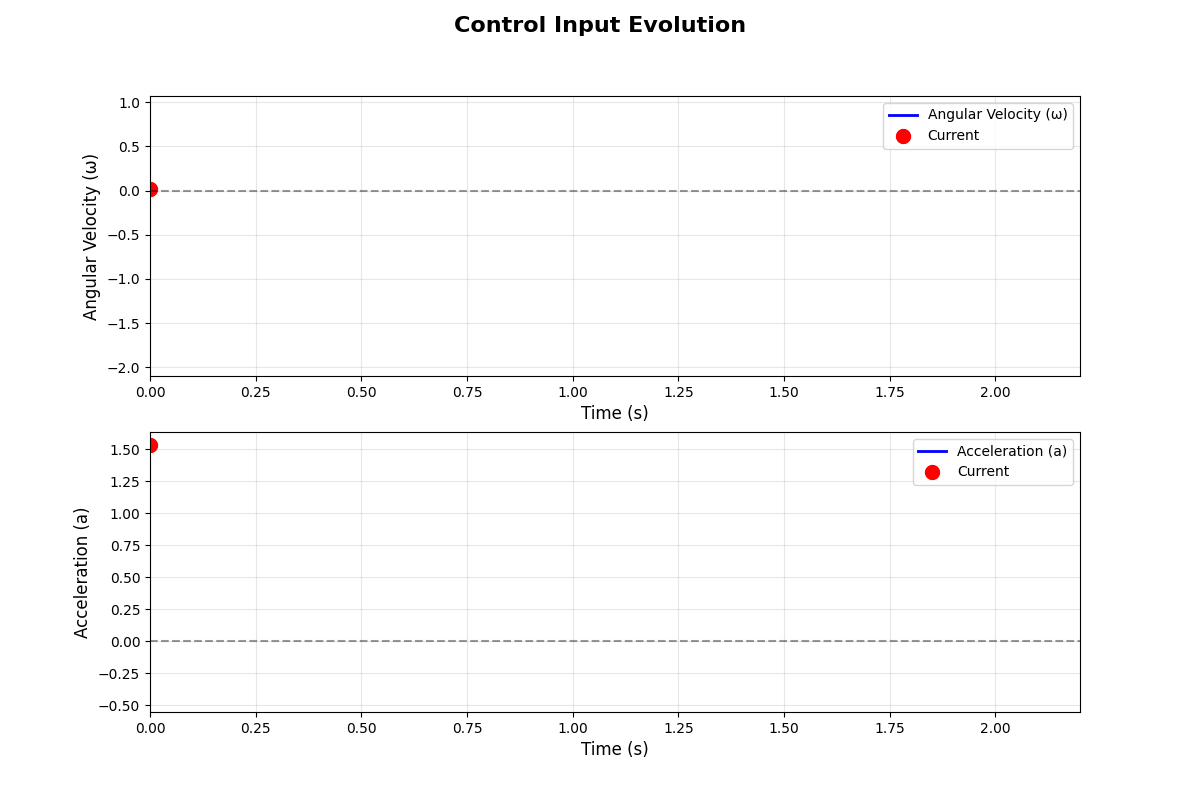

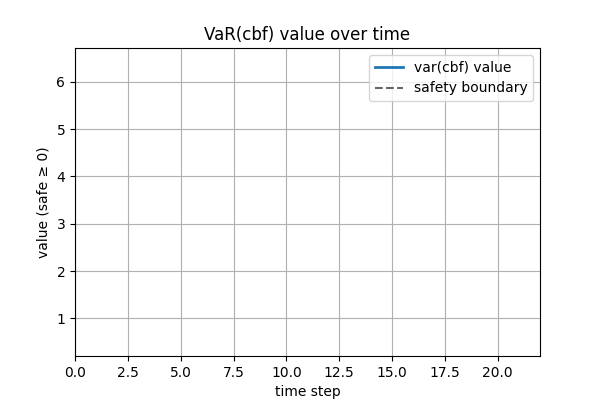

✅ Animation saved to: figs/results_Worst_target_goal[-2.0, 0.0]_var.gif


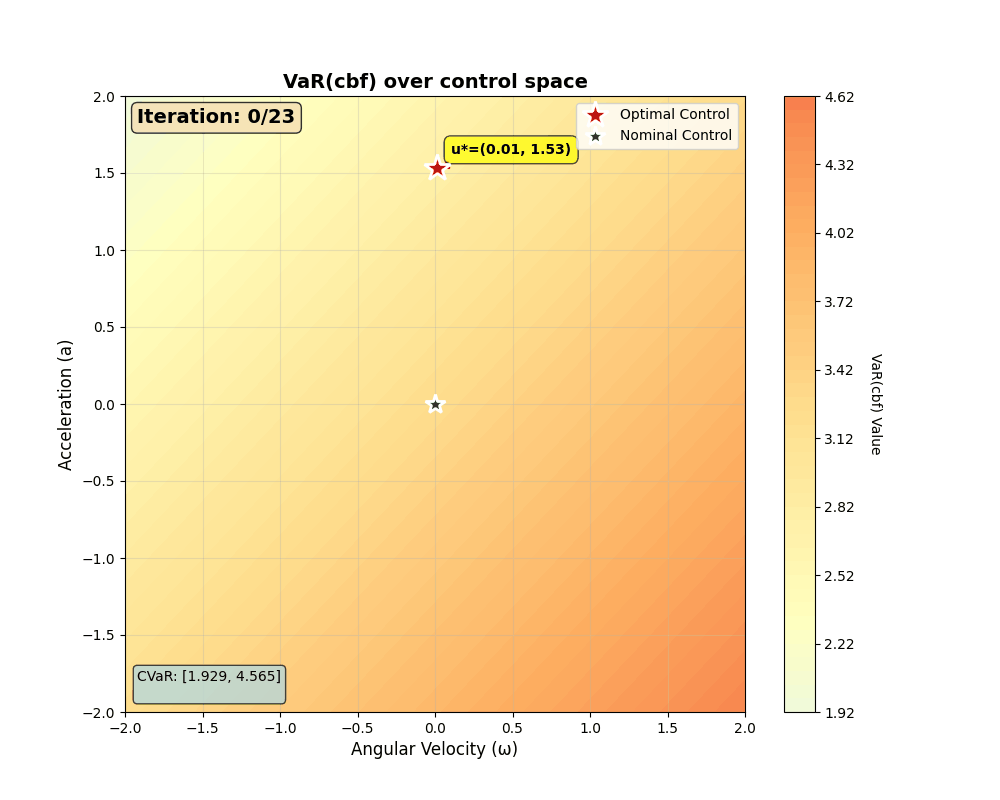

📊 Plots saved!
   IntentAwarePlanner initialized
   Planner: Probabilistic
   Target goal: [-2.0, 0.0]
   Device: cuda

🚀 Starting simulation: T_max=40
   Obstacle target: [-2.0, 0.0]


/home/sht/sht_project/particle_deepreach_upload/deepreach/simulations/utils_exp/intent_prediction_Pedestrian.py:300: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beta_idx = idx // self.G


✅ Goal reached at step 20 (time: 2.00s)
[metrics] min ego–obs distance: 0.532

📊 Simulation Complete!
   Steps: 20
   Time to goal: 2.00s
   Steps to goal: 20
   Min distance to obstacle: 0.532m
   Avg update time: 0.0005s
   Avg planning time: 1.0487s


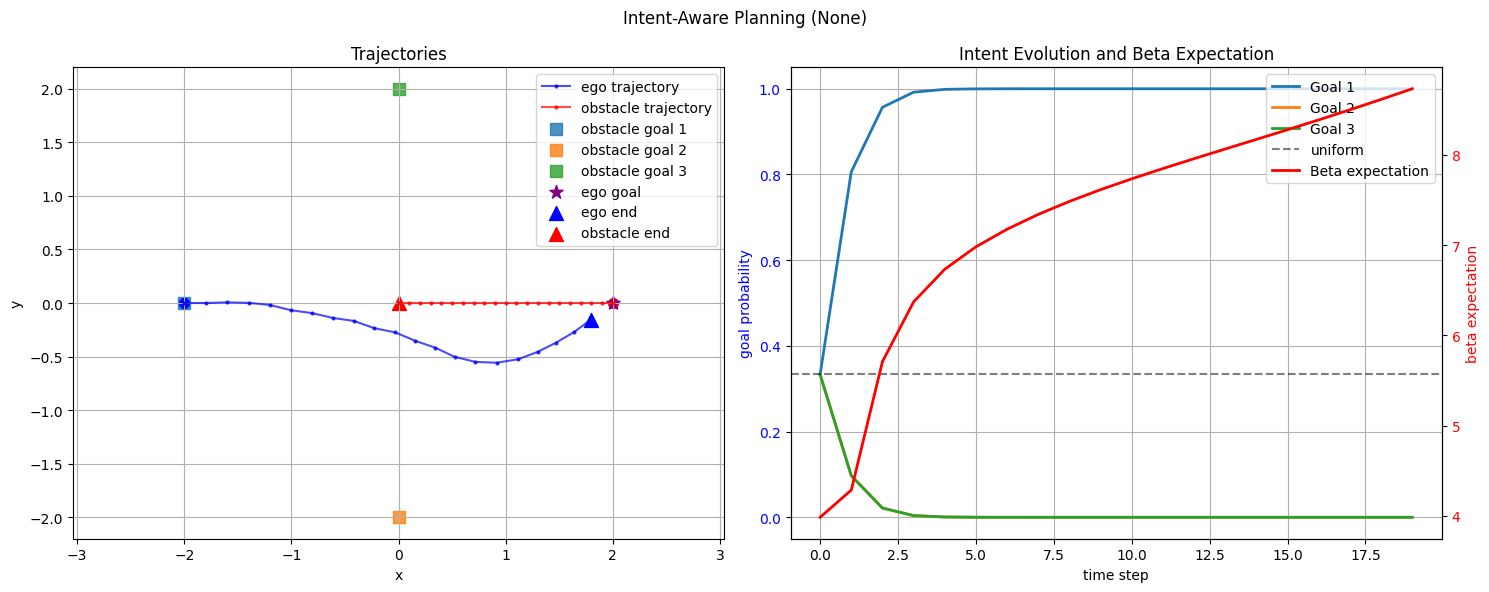

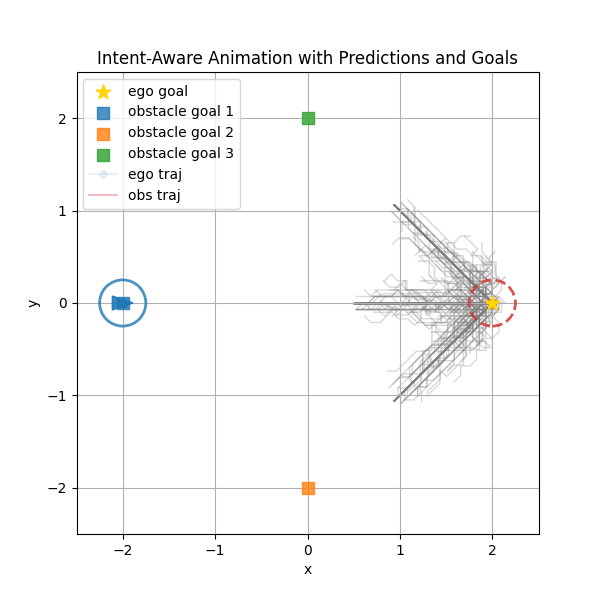

✅ Control animation saved to: figs/results_None_target_goal[-2.0, 0.0]_controls.gif


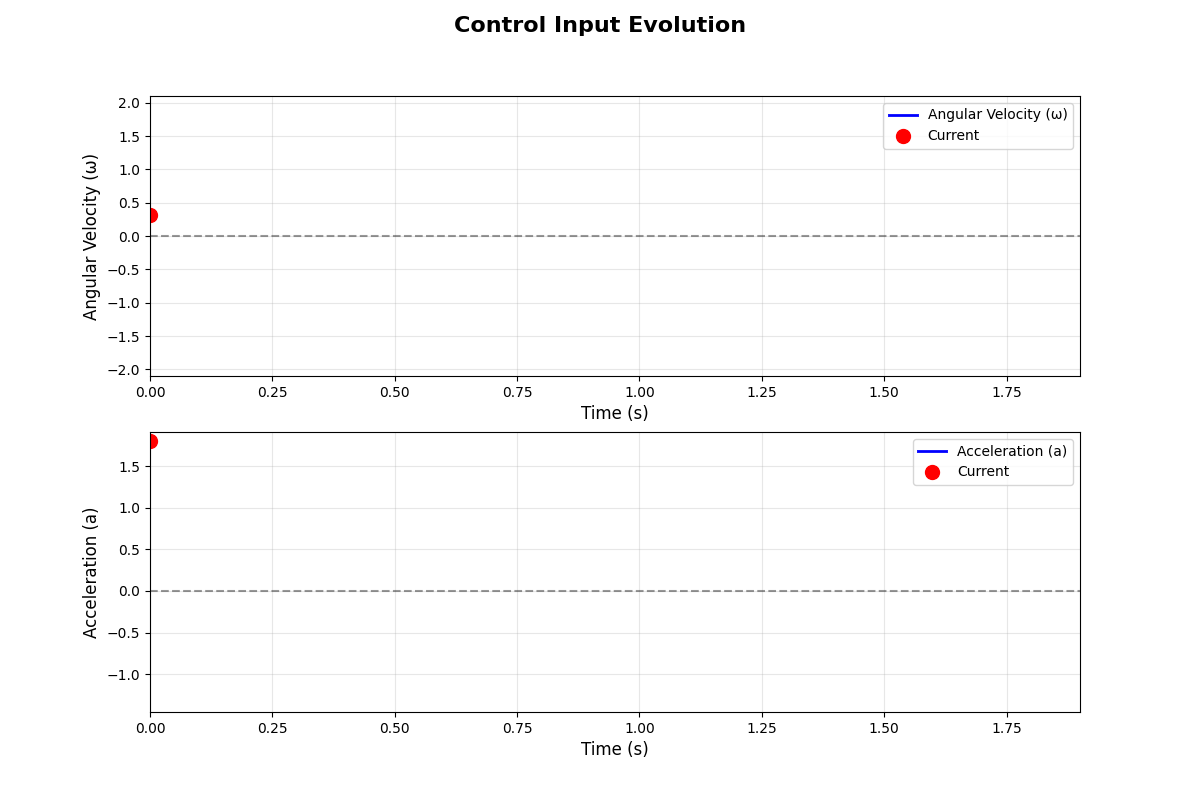

No cvar values to plot
📊 Plots saved!


In [1]:
from experiments import *

# === COMPARE ALL THREE CONFIGURATIONS ===

# 1. MPPI with Predict_TV
config_mppi_pred = get_config_mppi_particle()
print(f"Config 1: Planner={config_mppi_pred.planner_type}, Dynamics={config_mppi_pred.dynamics_type}")

# 2. MPPI with Worst-case
config_mppi_worst = get_config_mppi_worst()
print(f"Config 2: Planner={config_mppi_worst.planner_type}, Dynamics={config_mppi_worst.dynamics_type}")

# 3. Probabilistic (no dynamics model)
config_prob = get_config_probabilistic()
print(f"Config 3: Planner={config_prob.planner_type}, Dynamics={config_prob.dynamics_type}")
# Output: "Config 3: Planner=Probabilistic, Dynamics=None"

# === RUN EXPERIMENTS ===
results = {
    'MPPI-Predict': run_experiment(config_mppi_pred),
    'MPPI-Worst': run_experiment(config_mppi_worst),
    'Probabilistic': run_experiment(config_prob)
}


In [2]:
# Time to goal for all
print([r['time_to_goal'] for r in results.values()])

# Min distances for all  
print([r['min_distance'] for r in results.values()])

# Success status
print([r['goal_reached'] for r in results.values()])

# Which one was fastest?
fastest = min(results.items(), key=lambda x: x[1]['time_to_goal'])
print(f"Fastest: {fastest[0]} - {fastest[1]['time_to_goal']:.2f}s")

# Which one was safest (largest min distance)?
safest = max(results.items(), key=lambda x: x[1]['min_distance'])
print(f"Safest: {safest[0]} - {safest[1]['min_distance']:.3f}m")

[2.4000000000000004, 2.3000000000000003, 2.0]
[0.6926249265670776, 0.936096727848053, 0.5323758721351624]
[True, True, True]
Fastest: Probabilistic - 2.00s
Safest: MPPI-Worst - 0.936m


In [3]:
# === CUSTOM CONFIGURATIONS ===

# Custom MPPI
custom_mppi = get_config_custom(
    planner_type="MPPI",
    dynamics_type="Predict_TV",
    target_goal=[0.0, 2.0],
    cvar_weight=500.0,
)

# Custom Probabilistic (dynamics_type ignored)
custom_prob = get_config_custom(
    planner_type="Probabilistic",
    dynamics_type="Predict_TV",  # This will be set to None automatically
    target_goal=[0.0, 2.0],
    collision_threshold=0.1
)

# === VALIDATION ===
# This will raise an error (Probabilistic can't have dynamics type manually set)
try:
    bad_config = ExperimentConfig(
        planner_type="Probabilistic",
        dynamics_type="Predict_TV"  # Will be overridden to None in __post_init__
    )
    # This is actually OK - it just gets set to None
    print(f"Dynamics type was set to: {bad_config.dynamics_type}")  # None
except ValueError as e:
    print(f"Error: {e}")

Dynamics type was set to: None
